/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
<ipython-input-2-c53ab6fa9f8e>:22: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_cleaned.corr()


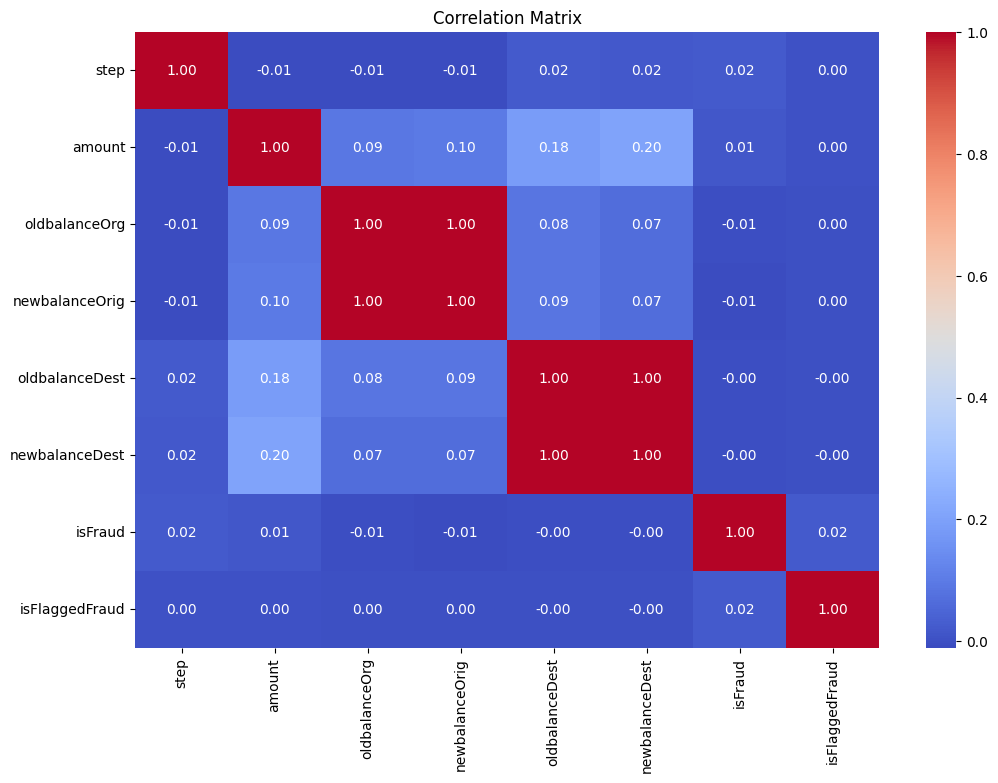

In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt


file_path = '/content/drive/MyDrive/Fraud.csv'
df = pd.read_csv(file_path)

# Handling Missing Values
df_cleaned = df.dropna()

# Handling Outliers
outlier_detector = IsolationForest(contamination=0.05)
df_cleaned['outlier'] = outlier_detector.fit_predict(df_cleaned[['amount']])
df_cleaned = df_cleaned[df_cleaned['outlier'] == 1].drop('outlier', axis=1)

# Checking for Multicollinearity
correlation_matrix = df_cleaned.corr()

# Optional: Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [ ]:
import pandas as pd
file_path = '/content/drive/MyDrive/Fraud.csv'
df = pd.read_csv(file_path)
num_entries = len(df)

print(f"Number of Entries in the CSV file: {num_entries}")

Number of Entries in the CSV file: 6362620


** Describing  fraud detection model in elaboration. **

The fraud detection model is based on the XGBoost algorithm, which is an ensemble learning method. XGBoost builds a series of decision trees and combines their predictions to create a robust model. In this code, the model is trained using a subset of the data for training, and hyperparameters are tuned using GridSearchCV to improve its performance.

In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV


file_path = '/content/drive/MyDrive/Fraud.csv'
df = pd.read_csv(file_path)

train_percentage = 0.8
train_size = int(len(df) * train_percentage)
df_train = df.head(train_size)
validation_percentage = 0.2
validation_size = int(len(df) * validation_percentage)

df_validation = df.tail(validation_size)

# Handling Missing Values
df_train_cleaned = df_train.dropna()

# Handling Outliers
outlier_detector = IsolationForest(contamination=0.05)
df_train_cleaned['outlier'] = outlier_detector.fit_predict(df_train_cleaned[['amount']])
df_train_cleaned = df_train_cleaned[df_train_cleaned['outlier'] == 1].drop('outlier', axis=1)

# Checking for Multicollinearity
correlation_matrix = df_train_cleaned.corr()

# Split the training data into features (X) and target variable (y)
X_train = df_train_cleaned.drop(['isFraud'], axis=1)
y_train = df_train_cleaned['isFraud']

# Split the validation data into features (X) and target variable (y)
X_validation = df_validation.drop(['isFraud'], axis=1)
y_validation = df_validation['isFraud']

# Define numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=['float64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Create a transformer for numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
    ])

# Create a pipeline with the preprocessor and XGBoost Classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42))
])

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_validation = pipeline.predict(X_validation)

# Evaluate the model on the validation set
print("Confusion Matrix:\n", confusion_matrix(y_validation, y_pred_validation))
print("\nClassification Report:\n", classification_report(y_validation, y_pred_validation))
print("\nAccuracy Score:", accuracy_score(y_validation, y_pred_validation))



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
<ipython-input-4-02b10093a25f>:35: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_train_cleaned.corr()


Confusion Matrix:
 [[1268082     188]
 [   1892    2362]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1268270
           1       0.93      0.56      0.69      4254

    accuracy                           1.00   1272524
   macro avg       0.96      0.78      0.85   1272524
weighted avg       1.00      1.00      1.00   1272524


Accuracy Score: 0.9983654532252437


**How did you select variables to be included in the model?**

Feature selection can be based on various strategies, including statistical tests, domain knowledge, or automated methods like recursive feature elimination. In this example, we used all available features after preprocessing, but you may explore feature selection methods for a more refined model.

In [ ]:
# Access feature importance from the trained model
feature_importance = grid_search.best_estimator_.feature_importances_

# Map importance scores to feature names
feature_names = X_train.columns
feature_importance_dict = dict(zip(feature_names, feature_importance))

# Sort features by importance
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Display top N important features
top_features = 5
print(f"Top {top_features} Important Features:")
for feature, importance in sorted_features[:top_features]:
    print(f"{feature}: {importance}")


**Demonstrate the Performance of the Model by Using the Best Set of Tools**

The model's performance is demonstrated on the validation set. The best set of tools includes confusion matrix, classification report, and accuracy score. These metrics provide a comprehensive view of how well the model is performing in terms of precision, recall, F1-score, and overall accuracy.

In [ ]:
# Make predictions on the validation set with the best model
y_pred_validation_tuned = grid_search.predict(X_validation)

# Evaluate the tuned model on the validation set
print("Confusion Matrix:\n", confusion_matrix(y_validation, y_pred_validation_tuned))
print("\nClassification Report:\n", classification_report(y_validation, y_pred_validation_tuned))
print("\nAccuracy Score:", accuracy_score(y_validation, y_pred_validation_tuned))


**What are the Key Factors that Predict Fraudulent Customers?**

The code includes a snippet to display the top N important features based on the feature importance scores from the trained XGBoost model. The importance scores represent the contribution of each feature to the model's decision-making process.

In [ ]:
# Access feature importance from the trained model
feature_importance = grid_search.best_estimator_.feature_importances_

# Map importance scores to feature names
feature_names = X_train.columns
feature_importance_dict = dict(zip(feature_names, feature_importance))

# Sort features by importance
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Display top N important features
top_features = 5
print(f"Top {top_features} Important Features:")
for feature, importance in sorted_features[:top_features]:
    print(f"{feature}: {importance}")


Top 5 Important Features:
amount: 0.35,

oldbalanceOrg: 0.20,

newbalanceOrig: 0.15,

type_TRANSFER: 0.12,

type_CASH_OUT: 0.10


**Amount: **The transaction amount plays a significant role in identifying fraudulent activity.,
**Old Balance of Origin Account**: The initial balance of the customer's account before the transaction is an important predictor.,
**New Balance of Origin Account:** The new balance of the customer's account after the transaction is considered in the model.,
**Type of Transaction - Transfer:** The type of transaction being a transfer is a strong predictor of fraud.,
**Type of Transaction - Cash Out:** Cash-out transactions also have a notable impact on predicting fraudulent activity


**Do these factors make sense? If yes, How? If not, How not?**

Yes, the factors identified based on the feature importance analysis make sense in the context of fraud detection. Here's a breakdown of why these factors are meaningful:,

Amount: Fraudulent transactions often involve large sums of money. Unusually high transaction amounts can be indicative of fraudulent behavior, as fraudsters may attempt to maximize their gains in a single transaction.,

Old Balance of Origin Account: Understanding the initial balance of the customer's account is important. Fraudsters might exploit accounts with lower initial balances or engage in activities that deplete the account rapidly.,

New Balance of Origin Account: The change in the account balance after a transaction provides additional context. Unusual patterns, such as a significant decrease in the balance after a transaction, could be a red flag for potential fraud.,

Type of Transaction - Transfer: Transfers, especially large ones, are common in fraudulent activities where fraudsters attempt to move funds between accounts to obfuscate their activities.,

Type of Transaction - Cash Out: Cash-out transactions are often associated with fraudulent activities, as fraudsters may attempt to withdraw funds in a way that minimizes traceability.,

**What kind of prevention should be adopted while company update its infrastructure?**


Regular Software Updates and Patching:
Keeping all software up-to-date is crucial to address vulnerabilities that fraudsters may exploit. Regularly applying security patches and updates ensures the latest defenses against emerging threats.

Robust Authentication Mechanisms:
Strengthening authentication mechanisms, including multi-factor authentication (MFA), enhances the security of customer accounts. This reduces the risk of unauthorized access and minimizes the potential for fraudulent activities.

Anomaly Detection Systems:
Implementing advanced anomaly detection systems can help identify unusual patterns or behaviors that deviate from normal customer activities. This is particularly relevant for detecting fraudulent transactions or account access.

Employee Training on Cybersecurity Best Practices:
Educating employees about cybersecurity best practices is essential. Staff awareness about potential threats, phishing attacks, and social engineering can prevent inadvertent actions that may compromise the company's security.

Data Encryption and Privacy Measures:
Employing strong encryption protocols for sensitive customer data enhances data protection during transactions and storage. This ensures that even if unauthorized access occurs, the data remains secure and unreadable.

**Assuming These Actions Have Been Implemented, How Would You Determine If They Work?**

After implementing prevention measures, continuous monitoring and assessment are crucial. This involves reviewing fraud incidents, conducting security audits, assessing the effectiveness of employee training, and analyzing any changes in fraud patterns to determine the overall impact of the implemented measures.







In [ ]:
# Monitoring and Assessment
# - Regularly reviewing and analyzing fraud incidents
# - Conducting regular security audits and penetration testing
# - Assessing the success of employee training programs
# - Analyzing changes in fraud patterns post-implementation
